In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector

# Load LFP data

In [3]:
# #------------------------------------------------------------------------------
# # load data from S1 data file 
# #------------------------------------------------------------------------------
import pickle
from matplotlib import pyplot as plt
import os
import IPython as ipy
import pickle as pkl
import scipy.signal as ss
import scipy.io as sio
import numpy as np
import mat73

from scipy.signal import butter, lfilter
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

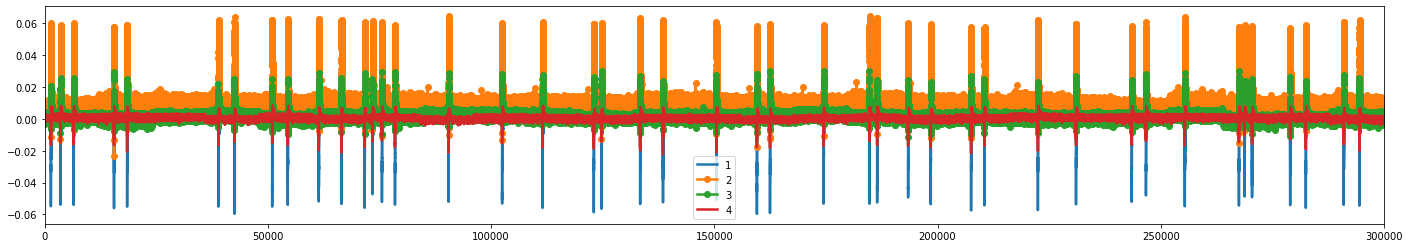

In [4]:
V = {}
for el in range(4):
    V[el] = []

dirname = '/home/fernando/Dropbox/SUNY/2023/v104/'

vname = 'v104_batch1'
bseed = 0

for vname in ['v104_batch1','v104_batch2']:
    
    for bseed in range(10):
        
        with open(dirname+vname+'/'+vname+'_'+str(bseed)+'_data.pkl', 'rb') as fileObj: S1Data = pickle.load(fileObj)    

        for t in range(6000-1,30000-1):
            for el in range(4):
                if abs(S1Data['simData']['LFP'][t][el]) < 0.00001:
                    xt = (S1Data['simData']['LFP'][t-1][el]+S1Data['simData']['LFP'][t+1][el])/2.0
                    V[el].append(xt)   
                else:
                    V[el].append(S1Data['simData']['LFP'][t][el])   


for vname in ['v104_batch3']:
    
    for bseed in range(5):
        
        with open(dirname+vname+'/'+vname+'_'+str(bseed)+'_data.pkl', 'rb') as fileObj: S1Data = pickle.load(fileObj)    

        for t in range(6000-1,30000-1):
            for el in range(4):
                if abs(S1Data['simData']['LFP'][t][el]) < 0.00001:
                    xt = (S1Data['simData']['LFP'][t-1][el]+S1Data['simData']['LFP'][t+1][el])/2.0
                    V[el].append(xt)   
                else:
                    V[el].append(S1Data['simData']['LFP'][t][el])   


            
            
            
timeRange = [0, 300000]
recordStep = 0.5
t = np.arange(timeRange[0], timeRange[1], recordStep) 

plt.figure(figsize=(24,4))
fontSize = 12
lw = 1

plt.plot(t,V[0], '-', linewidth=2.5, label='1')
plt.plot(t,V[1], '-o', linewidth=2.5, label='2')
plt.plot(t,V[2], '-o', linewidth=2.5, label='3')
plt.plot(t,V[3], '-', linewidth=2.5, label='4')
plt.xlim(0,300000);
# plt.xlim(1500,2500);
plt.legend();

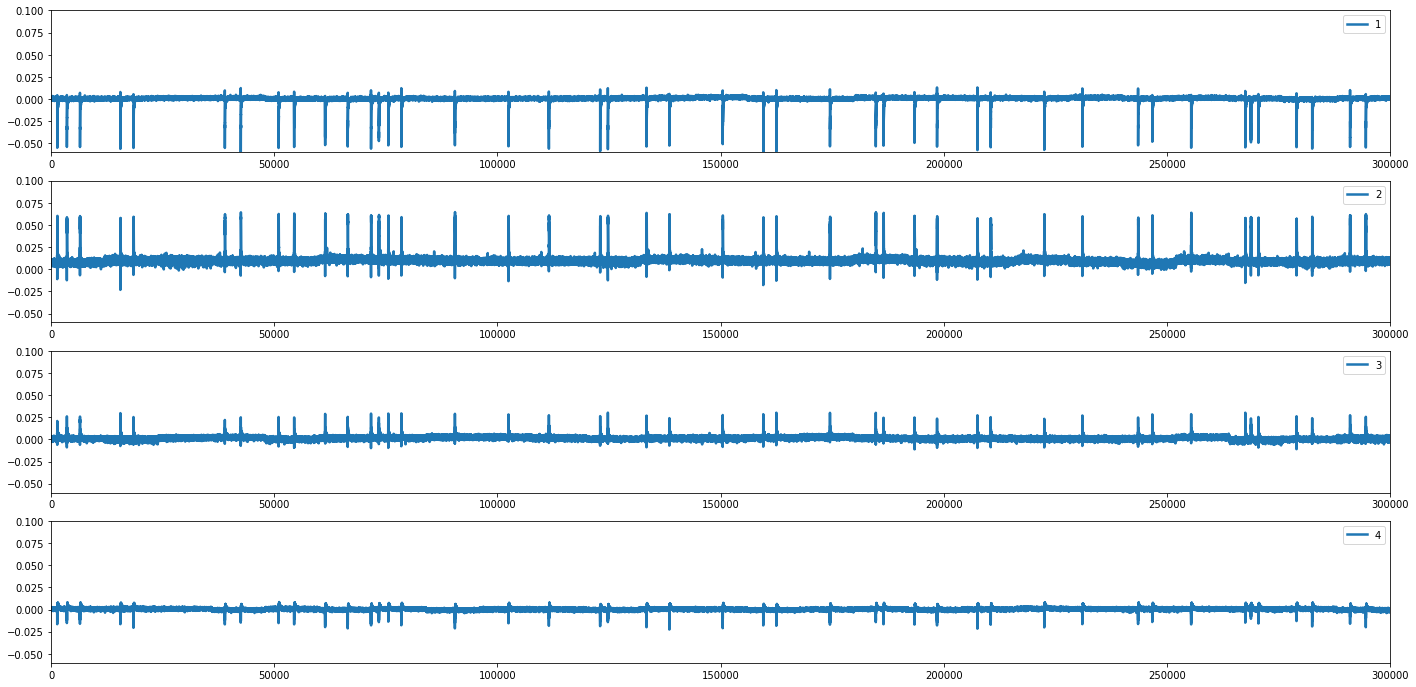

In [5]:
plt.figure(figsize=(24,12))
fontSize = 12
lw = 1

plt.subplot(4,1,1)
plt.plot(t,V[0], '-', linewidth=2.5, label='1')
plt.xlim(0,300000);
plt.ylim(-0.06,0.1);
plt.legend();
plt.subplot(4,1,2)
plt.plot(t,V[1], '-', linewidth=2.5, label='2')
plt.xlim(0,300000);
plt.ylim(-0.06,0.1);
plt.legend();
plt.subplot(4,1,3)
plt.plot(t,V[2], '-', linewidth=2.5, label='3')
plt.xlim(0,300000);
plt.ylim(-0.06,0.1);
plt.legend();
plt.subplot(4,1,4)
plt.plot(t,V[3], '-', linewidth=2.5, label='4')
plt.xlim(0,300000);
plt.ylim(-0.06,0.1);
plt.legend();

In [6]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def notch_filter(samp_freq,notch_freq,quality_factor,time,x):
    # Set time vector
    n = time
    noisySignal = x    
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
    freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)    
    # Apply notch filter to the noisy signal using signal.filtfilt
    outputSignal = signal.filtfilt(b_notch, a_notch, noisySignal)    
    return outputSignal

In [7]:
lfps = []
fs = 2000.0
lowcut = 20.0
highcut = 500.0

for mat_fnumber in range(4):
        
    y2 = butter_bandpass_filter(V[mat_fnumber], lowcut, highcut, fs, order=5)
    
    lfps.append(y2)

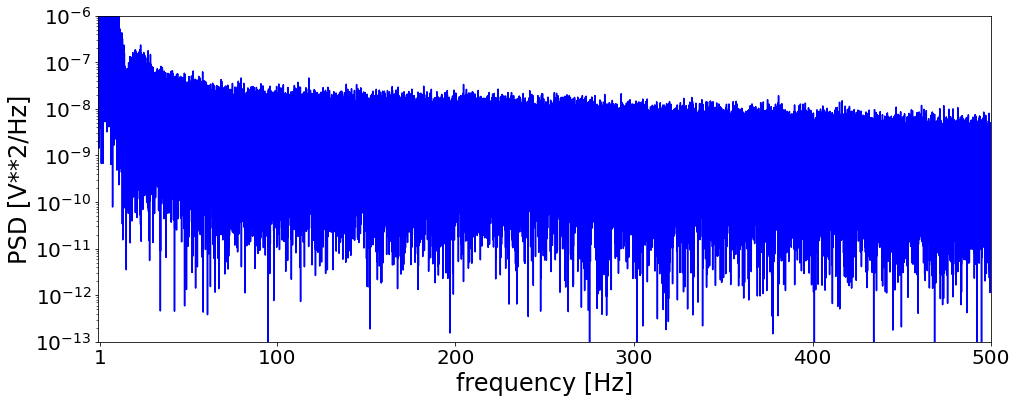

In [8]:
plt.figure(figsize=(16,6))
fontSize = 12

f, Pxx_den = ss.periodogram(V[1], fs)
plt.semilogy(f, Pxx_den,'b')

# f, Pxx_den = ss.periodogram(V[2], fs)
# plt.semilogy(f, Pxx_den,'r')

plt.ylim([1e-13, 1e-6])
plt.xlim([0.1, 500])
plt.xlabel('frequency [Hz]', fontsize=24)
plt.ylabel('PSD [V**2/Hz]', fontsize=24)
plt.yticks(fontsize = 20)
plt.xticks([1,100,200, 300,400,500], fontsize=20);

## Many LFPs, only two LFPs with ripples

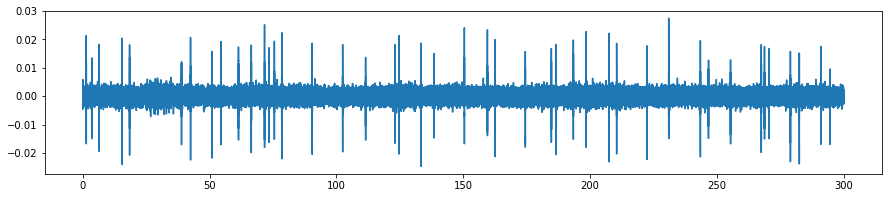

In [9]:
lfps2 = np.stack(
    (
#         lfps[0],
        lfps[1],
#         lfps[2],
#         lfps[3],
#         lfps[4],
#         lfps[5],
#         lfps[6],
#         lfps[7],
    ),
    axis=1,
)


fs = 2000.0

time = np.linspace(0, np.size(V[0])/fs, np.size(V[0]))

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps2)
speed = np.ones_like(time)


In [10]:
from ripple_detection import filter_ripple_band

SAMPLING_FREQUENCY = fs

In [11]:
filtered_lfps = filter_ripple_band(lfps2)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

,start_time,end_time
ripple_number,,
1,1.322002,1.436002
2,3.477506,3.593006
3,6.447511,6.532511
4,15.484026,15.581526
5,18.398531,18.494031
6,38.847065,38.996565
7,42.429571,42.555071
8,50.940585,51.012085
9,54.406591,54.502591


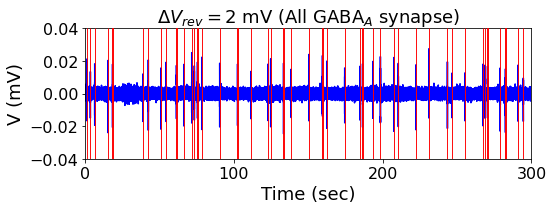

In [13]:
plt.figure(figsize=(8,2.4))

plt.title(r'$\Delta V_{rev} = 2$ mV (All GABA$_A$ synapse)', fontsize=18)

for ripple in Karlsson_ripple_times.itertuples():
    plt.axvspan(ripple.start_time, ripple.end_time, alpha=0.93, color="red", zorder=1000)

plt.plot(time, lfps2,'b')
plt.xlim(0,300)
plt.ylim(-0.04,0.04);

plt.yticks([-0.04,-0.02, 0 , 0.02,0.04], fontsize=16)
plt.xticks([0, 100, 200, 300], fontsize=16)
plt.ylabel('V (mV)', fontsize=18)
plt.xlabel('Time (sec)', fontsize=18)

plt.savefig('LFP_FR_DeltaVrev_2mV.png', facecolor = 'white', bbox_inches='tight' , dpi=300)


In [20]:
for ii in range(1,45):
    print('%d \t %.3f' % 
          (ii,Karlsson_ripple_times['end_time'][ii]-Karlsson_ripple_times['start_time'][ii]))

1 	 0.114
2 	 0.116
3 	 0.085
4 	 0.098
5 	 0.096
6 	 0.150
7 	 0.126
8 	 0.072
9 	 0.096
10 	 0.125
11 	 0.089
12 	 0.081
13 	 0.121
14 	 0.146
15 	 0.084
16 	 0.144
17 	 0.136
18 	 0.104
19 	 0.080
20 	 0.115
21 	 0.098
22 	 0.102
23 	 0.105
24 	 0.094
25 	 0.134
26 	 0.081
27 	 0.125
28 	 0.114
29 	 0.120
30 	 0.104
31 	 0.087
32 	 0.105
33 	 0.125
34 	 0.114
35 	 0.081
36 	 0.110
37 	 0.086
38 	 0.125
39 	 0.129
40 	 0.093
41 	 0.110
42 	 0.124
43 	 0.136
44 	 0.073


(85.25, 85.75)

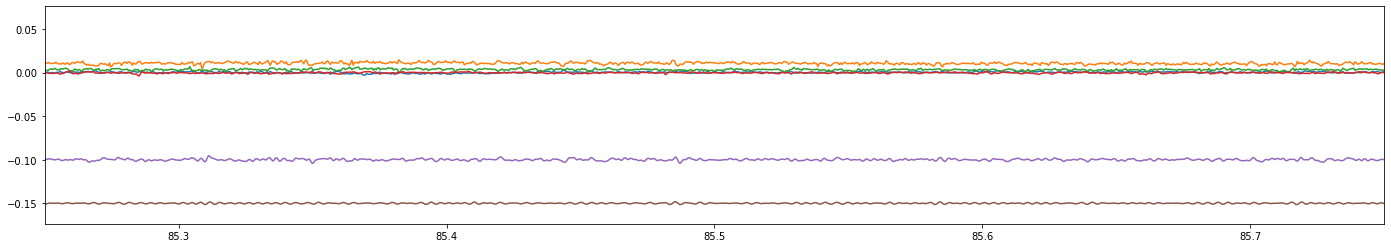

In [17]:
plt.figure(figsize=(24,4))
plt.plot(time, V[0])
plt.plot(time, V[1])
plt.plot(time, V[2])
plt.plot(time, V[3])
plt.plot(time, lfps[1]-0.1)
plt.plot(time, filtered_lfps-0.15)


# plt.ylim(-0.015,0.015);
plt.xlim(85.25,85.75)

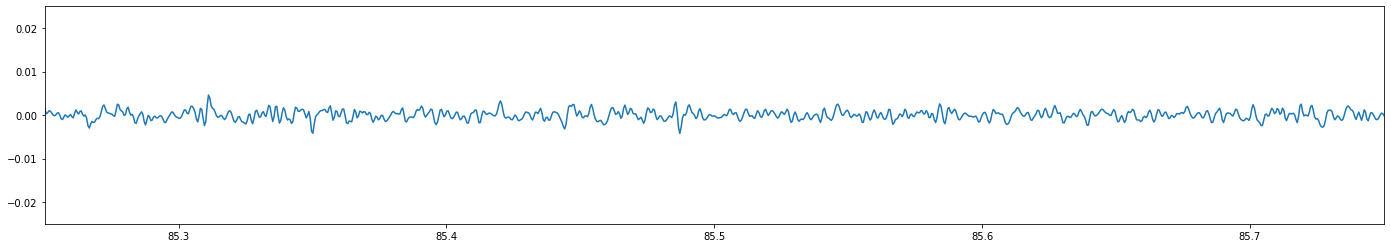

In [18]:
plt.figure(figsize=(24,4))
plt.plot(time, lfps2)
for ripple in Karlsson_ripple_times.itertuples():
    plt.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)

plt.xlim(85.25,85.75)
plt.ylim(-0.025,0.025);

In [19]:
# Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

# display(Kay_ripple_times)

# fig, ax = plt.subplots(figsize=(15, 3))
# ax.plot(time, lfps2)
# for ripple in Kay_ripple_times.itertuples():
#     ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)

# # plt.xlim(1.5,2.5)
# plt.ylim(-0.05,0.06);